# House Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
#Read the Bike Sharing Demand Training dataset, and see the general schema
df = pd.read_csv('hometrain.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# Checking the names of columns in the df
dfcols = df.columns
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<br>

<br>

## Handling Missing Data (EDA)

In [5]:
# Checking whether there are any empty values in the df, and if there is, which ones?
dfnan = ((df.isna().sum() /df.shape[0]).round(2).sort_values())
for i in dfcols:
    print(i, ":", dfnan[i])

Id : 0.0
MSSubClass : 0.0
MSZoning : 0.0
LotFrontage : 0.18
LotArea : 0.0
Street : 0.0
Alley : 0.94
LotShape : 0.0
LandContour : 0.0
Utilities : 0.0
LotConfig : 0.0
LandSlope : 0.0
Neighborhood : 0.0
Condition1 : 0.0
Condition2 : 0.0
BldgType : 0.0
HouseStyle : 0.0
OverallQual : 0.0
OverallCond : 0.0
YearBuilt : 0.0
YearRemodAdd : 0.0
RoofStyle : 0.0
RoofMatl : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.01
MasVnrArea : 0.01
ExterQual : 0.0
ExterCond : 0.0
Foundation : 0.0
BsmtQual : 0.03
BsmtCond : 0.03
BsmtExposure : 0.03
BsmtFinType1 : 0.03
BsmtFinSF1 : 0.0
BsmtFinType2 : 0.03
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
TotalBsmtSF : 0.0
Heating : 0.0
HeatingQC : 0.0
CentralAir : 0.0
Electrical : 0.0
1stFlrSF : 0.0
2ndFlrSF : 0.0
LowQualFinSF : 0.0
GrLivArea : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
FullBath : 0.0
HalfBath : 0.0
BedroomAbvGr : 0.0
KitchenAbvGr : 0.0
KitchenQual : 0.0
TotRmsAbvGrd : 0.0
Functional : 0.0
Fireplaces : 0.0
FireplaceQu : 0.47
GarageType : 0.06
GarageYr

### Dropping empty columns

In [6]:
#Dropped the empty column
df.drop(['PoolQC'], axis = 1, inplace = True)

#### PoolQC had a completely empty array, therefore it was deleted

### Categorical Data

In [7]:
# Some categorical columns had some of their values set as "Null" because their actual value was None (Zero), therefore, their values are filled with the letter N
fill_df = df[['MiscFeature', 'Fence', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'FireplaceQu', \
              'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'Alley', 'MasVnrType']]
fill_df.fillna('N', inplace = True)

In [8]:
# Checking whether the values were filled
(fill_df.isna().sum() /fill_df.shape[0]).round(2).sort_values()

MiscFeature     0.0
Fence           0.0
GarageCond      0.0
GarageQual      0.0
GarageFinish    0.0
GarageType      0.0
FireplaceQu     0.0
BsmtFinType2    0.0
BsmtFinType1    0.0
BsmtExposure    0.0
BsmtCond        0.0
BsmtQual        0.0
Alley           0.0
MasVnrType      0.0
dtype: float64

In [9]:
for i in fill_df:
    df[i] = fill_df[i]

In [10]:
(df.isna().sum() /df.shape[0]).round(2).sort_values()

Id              0.00
Fireplaces      0.00
Functional      0.00
TotRmsAbvGrd    0.00
KitchenQual     0.00
                ... 
RoofStyle       0.00
ExterCond       0.00
MasVnrArea      0.01
GarageYrBlt     0.06
LotFrontage     0.18
Length: 80, dtype: float64

### Numerical data

In [11]:
# Some of the numeric columns had their values missing, therefore, the columns were selected to be filled with mode
fill_num = df[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']]
fill_num.fillna(fill_num.mode(dropna=True).iloc[0], inplace = True)

In [12]:
# Checking whether the values was filled
(fill_num.isna().sum() /fill_num.shape[0]).round(2).sort_values()

LotFrontage    0.0
GarageYrBlt    0.0
MasVnrArea     0.0
dtype: float64

In [13]:
# Replacing the values from the fill dataframe into the original dataframe
for i in fill_num:
    df[i] = fill_num[i]

In [14]:
# Just a final check to see whether missing data was completely handled
(df.isna().sum() /df.shape[0]).round(2).sort_values()

Id               0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
                ... 
Exterior1st      0.0
RoofMatl         0.0
RoofStyle        0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64

## Deleting outliers

In [15]:
(df.isna().sum() /df.shape[0]).round(2).sort_values()

Id               0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
                ... 
Exterior1st      0.0
RoofMatl         0.0
RoofStyle        0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64

<br>

<br>

## Label encoding for categorical data

### Ordinal attributes

#### Selected ordinal features

* ExterQual: Exterior material quality
* ExterCond: Current exterior material condition 
* BsmtQual: Basement height
* BsmtCond: Basement condition
* BsmtExposure: Garden level walls exposure on basement
* BsmtFinType1: Basement finished area rating
* BsmtFinType2: Multiple basement finished area rating
* HeatingQC: Heating quality
* KitchenQual: Kitchen quality
* Functional: Home functionality
* FireplaceQu: Fireplace quality 
* GarageFinish: Interior garage finish
* GarageQual: Garage quality
* GarageCond: Garage condition
* Fence: Fence privacy level / Material condition
* LotShape: Property shape regularity
* LandSlope: Slope of property

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Selecting the ordinally categorized features
ord_features = df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', \
                   'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', \
                   'GarageCond', 'Fence', 'LotShape', 'LandSlope']]

# Creating a matrix that includes the unique values (keys) inside each feature
features_mat = []
for i in ord_features:
    unique_feature_arr = np.unique(df[i])
    arr = []
    for j in unique_feature_arr:
        arr.append(j)
    features_mat.append(arr)

features_mat

[['Ex', 'Fa', 'Gd', 'TA'],
 ['Ex', 'Fa', 'Gd', 'Po', 'TA'],
 ['Ex', 'Fa', 'Gd', 'N', 'TA'],
 ['Fa', 'Gd', 'N', 'Po', 'TA'],
 ['Av', 'Gd', 'Mn', 'N', 'No'],
 ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'N', 'Rec', 'Unf'],
 ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'N', 'Rec', 'Unf'],
 ['Ex', 'Fa', 'Gd', 'Po', 'TA'],
 ['Ex', 'Fa', 'Gd', 'TA'],
 ['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'],
 ['Ex', 'Fa', 'Gd', 'N', 'Po', 'TA'],
 ['Fin', 'N', 'RFn', 'Unf'],
 ['Ex', 'Fa', 'Gd', 'N', 'Po', 'TA'],
 ['Ex', 'Fa', 'Gd', 'N', 'Po', 'TA'],
 ['GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'N'],
 ['IR1', 'IR2', 'IR3', 'Reg'],
 ['Gtl', 'Mod', 'Sev']]

In [18]:
# Fixing categories positions to assign a rating for them based on their order
features_mat = [['Ex', 'Gd', 'TA', 'Fa'], \
                ['Ex', 'Gd', 'TA', 'Fa', 'Po'], \
                ['Ex', 'Gd', 'TA', 'Fa', 'N'], \
                ['Gd', 'TA', 'Fa', 'Po', 'N'], \
                ['Gd', 'Av', 'Mn', 'No', 'N'], \
                ['GLQ','ALQ','BLQ','Rec','LwQ', 'Unf', 'N'], \
                ['GLQ','ALQ','BLQ','Rec','LwQ', 'Unf', 'N'], \
                ['Ex', 'Gd', 'TA', 'Fa', 'Po'], \
                ['Ex', 'Gd', 'TA', 'Fa'], \
                ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev'], \
                ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N'], \
                ['Fin', 'RFn', 'Unf', 'N'], \
                ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N'], \
                ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N'], \
                ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'N'], \
                ['Reg', 'IR1', 'IR2', 'IR3'], \
                ['Gtl', 'Mod', 'Sev']]

In [19]:
# Creating dictionaries for the features in order to map each feature into its value (e.g.: Excelent: 5, Good: 4.. etc.)
features_dict = []
for i in features_mat:
    dictionary = dict()
    for j in range(len(i)):
        dictionary.update({i[j]: len(i) - j})
    features_dict.append(dictionary)
features_dict

[{'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'N': 1},
 {'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'N': 1},
 {'Gd': 5, 'Av': 4, 'Mn': 3, 'No': 2, 'N': 1},
 {'GLQ': 7, 'ALQ': 6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'Unf': 2, 'N': 1},
 {'GLQ': 7, 'ALQ': 6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'Unf': 2, 'N': 1},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
 {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1},
 {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1},
 {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'N': 1},
 {'Fin': 4, 'RFn': 3, 'Unf': 2, 'N': 1},
 {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'N': 1},
 {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'N': 1},
 {'GdPrv': 5, 'MnPrv': 4, 'GdWo': 3, 'MnWw': 2, 'N': 1},
 {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
 {'Gtl': 3, 'Mod': 2, 'Sev': 1}]

In [20]:
# Mapping the features into the replicated dataframe in order to change ordinal categories into values (ratings)
cols = ord_features.columns
for i in range(0, len(cols)):
    ord_features[cols[i]] = ord_features[cols[i]].map(features_dict[i])

In [21]:
# Replacing the values of the replicated df into the original df
for i in ord_features:
    df[i] = ord_features[i]

In [22]:
# Checking the values of the ordinal features from the original df
df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', \
    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'LotShape']]

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,Fence,LotShape
0,3,3,4,4,2,7,2,5,3,7,1,3,4,4,1,4
1,2,3,4,4,5,6,2,5,2,7,4,3,4,4,1,4
2,3,3,4,4,3,7,2,5,3,7,4,3,4,4,1,3
3,2,3,3,5,2,6,2,4,3,7,5,2,4,4,1,3
4,3,3,4,4,4,7,2,5,3,7,4,3,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,3,4,4,2,2,2,5,2,7,4,3,4,4,1,4
1456,2,3,4,4,2,6,4,3,2,6,4,2,4,4,4,4
1457,4,4,3,5,2,7,2,5,3,7,5,3,4,4,5,4
1458,2,3,3,4,3,7,4,4,3,7,1,2,4,4,1,4


### Nominal attributes

#### Selected nominal features

* MSSubClass: Sale dwelling type
* MSZoning: General sale zoning classifier
* Street: Road type associated to access property
* Alley: Alley type associated to access property
* LandContour: Property flatness
* Utilities: Available utilities
* LotConfig: Lot configuration status
* Neighborhood: Physical location in "Ames city"
* Condition1: Conditions promixity 
* Condition2: Conditions promixity - for several cases
* BldgType: dwelling / building type
* HouseStyle: dwelling / building style
* RoofStyle: Roof type
* RoofMatl: Roof material
* Exterior1st: Exterior coverage
* Exterior2nd: Exterior coverage - for several materials
* MasVnrType: Mansony veneer type
* Foundation: Foundation type
* Heating: Heating type
* Electrical: Elictrical system type
* GarageType: Garage house adjacency (location)
* PavedDrive: Type of driving pave
* MiscFeature: House charactiristics uncovered in other features
* SaleType: Type of sale payment
* SaleCondition: Type of sale condition

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [24]:
# Selecting the nominally categorized features
nom_features = df[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', \
                   'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', \
                   'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive', \
                   'MiscFeature', 'SaleType', 'SaleCondition']]

# Initializing the Label Encoder
ple = preprocessing.LabelEncoder()

# Setting each feature's unique classes into random variables to represent them
for feature in nom_features:
    nom_features[feature] = ple.fit_transform(nom_features[feature].astype(str))

# Creating a matrix of the unique values (which will be the numbers in each feature) in order to map each value into its
# One-Hot schema
features_mat = []
for i in nom_features:
    unique_feature_arr = np.unique(nom_features[i])
    arr = []
    for j in unique_feature_arr:
        arr.append(j)
    features_mat.append(arr)
    print(arr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 4]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5]


In [25]:
# Setting the labels of the new to-be-added to the df features (after One-Hot encoding) 
labels = []
for i in nom_features.columns:
    feature_labels = [ i + str(label) for label in np.unique(nom_features[i])]
    labels.append(feature_labels)
    print(feature_labels) # print the content of labels

['MSSubClass0', 'MSSubClass1', 'MSSubClass2', 'MSSubClass3', 'MSSubClass4', 'MSSubClass5', 'MSSubClass6', 'MSSubClass7', 'MSSubClass8', 'MSSubClass9', 'MSSubClass10', 'MSSubClass11', 'MSSubClass12', 'MSSubClass13', 'MSSubClass14']
['MSZoning0', 'MSZoning1', 'MSZoning2', 'MSZoning3', 'MSZoning4']
['Street0', 'Street1']
['Alley0', 'Alley1', 'Alley2']
['LandContour0', 'LandContour1', 'LandContour2', 'LandContour3']
['Utilities0', 'Utilities1']
['LotConfig0', 'LotConfig1', 'LotConfig2', 'LotConfig3', 'LotConfig4']
['Neighborhood0', 'Neighborhood1', 'Neighborhood2', 'Neighborhood3', 'Neighborhood4', 'Neighborhood5', 'Neighborhood6', 'Neighborhood7', 'Neighborhood8', 'Neighborhood9', 'Neighborhood10', 'Neighborhood11', 'Neighborhood12', 'Neighborhood13', 'Neighborhood14', 'Neighborhood15', 'Neighborhood16', 'Neighborhood17', 'Neighborhood18', 'Neighborhood19', 'Neighborhood20', 'Neighborhood21', 'Neighborhood22', 'Neighborhood23', 'Neighborhood24']
['Condition10', 'Condition11', 'Condition12

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
# Encoding each class (from each feature) into a hot-encoding scheme for the ML model to process approperiately
ohe = OneHotEncoder()
nom_mat = []
for col in nom_features.columns:
    nom_features_arr = ohe.fit_transform(nom_features[[col]]).toarray()
    nom_mat.append(nom_features_arr)
nom_mat

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]]),
 array([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1.,

In [28]:
# Creating new rows, and naming each column based on its category and inserting its values to it.
for i in range(len(labels)):
    for j in range(len(labels[i])):
        for k in nom_mat[i][j]:
            df[labels[i][j]] = k

In [29]:
# Dropping the classes' parent featuresm as they became less useful to the model to learn from
df = df.drop(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', \
              'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', \
              'Exterior2nd','MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive', \
              'MiscFeature', 'SaleType', 'SaleCondition'], axis = 1)

In [30]:
# Checking the changes on the dataframe through its head
df.head()

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType5,SaleType6,SaleType7,SaleType8,SaleCondition0,SaleCondition1,SaleCondition2,SaleCondition3,SaleCondition4,SaleCondition5
0,1,65.0,8450,4,3,7,5,2003,2003,196.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,80.0,9600,4,3,6,8,1976,1976,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,68.0,11250,3,3,7,5,2001,2002,162.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,60.0,9550,3,3,7,5,1915,1970,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,84.0,14260,3,3,8,5,2000,2000,350.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Boolean attributes

In [31]:
# 1 Attribute was set into Y / N therefore it had to be changed into True / False (Boolean)
df['CentralAir'] = df['CentralAir'].map({'Y': 1, 'N': 0})
df['CentralAir']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1460, dtype: int64

In [32]:
# A final overlook into the dataframe
df

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType5,SaleType6,SaleType7,SaleType8,SaleCondition0,SaleCondition1,SaleCondition2,SaleCondition3,SaleCondition4,SaleCondition5
0,1,65.0,8450,4,3,7,5,2003,2003,196.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,80.0,9600,4,3,6,8,1976,1976,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,68.0,11250,3,3,7,5,2001,2002,162.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,60.0,9550,3,3,7,5,1915,1970,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,84.0,14260,3,3,8,5,2000,2000,350.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,4,3,6,5,1999,2000,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,1457,85.0,13175,4,3,6,6,1978,1988,119.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,1458,66.0,9042,4,3,7,9,1941,2006,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,1459,68.0,9717,4,3,5,6,1950,1996,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<br>

## Checking the data distribution to decide which require numerical processing

In [33]:
# Selecting the first 55 features (80(total before deletion)-25(deleted)) into a new dataframe
featdf = df.iloc[:, : 55]
featdf

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,4,3,7,5,2003,2003,196.0,...,61,0,0,0,0,1,0,2,2008,208500
1,2,80.0,9600,4,3,6,8,1976,1976,0.0,...,0,0,0,0,0,1,0,5,2007,181500
2,3,68.0,11250,3,3,7,5,2001,2002,162.0,...,42,0,0,0,0,1,0,9,2008,223500
3,4,60.0,9550,3,3,7,5,1915,1970,0.0,...,35,272,0,0,0,1,0,2,2006,140000
4,5,84.0,14260,3,3,8,5,2000,2000,350.0,...,84,0,0,0,0,1,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,4,3,6,5,1999,2000,0.0,...,40,0,0,0,0,1,0,8,2007,175000
1456,1457,85.0,13175,4,3,6,6,1978,1988,119.0,...,0,0,0,0,0,4,0,2,2010,210000
1457,1458,66.0,9042,4,3,7,9,1941,2006,0.0,...,60,0,0,0,0,5,2500,5,2010,266500
1458,1459,68.0,9717,4,3,5,6,1950,1996,0.0,...,0,112,0,0,0,1,0,4,2010,142125


In [34]:
import seaborn as sns

<ipython-input-35-bde0e189b109>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(5,5), sharey=True)


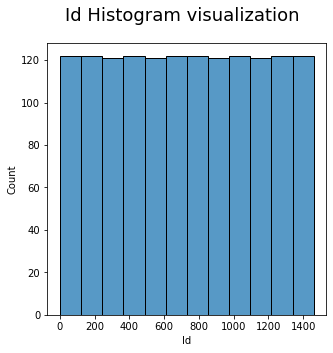

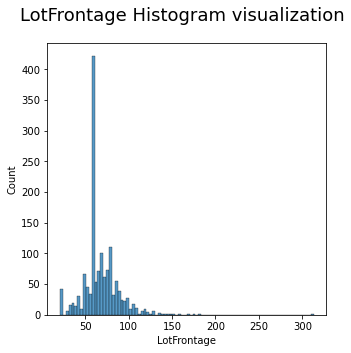

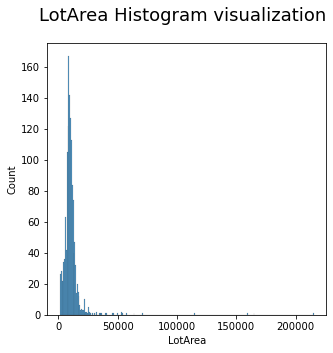

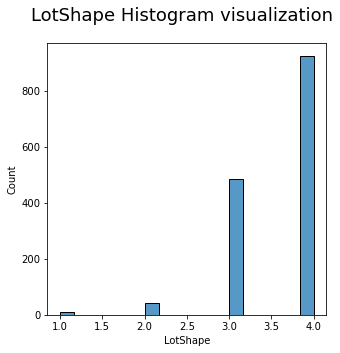

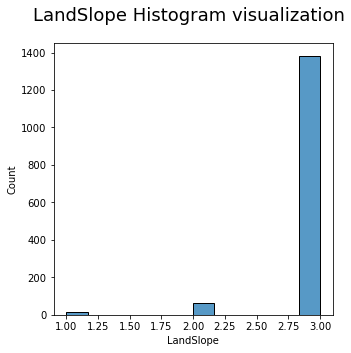

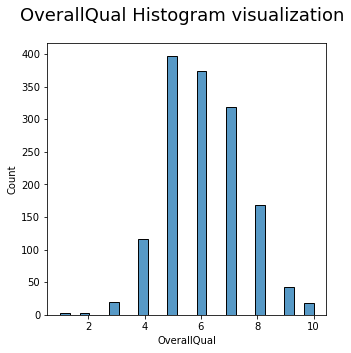

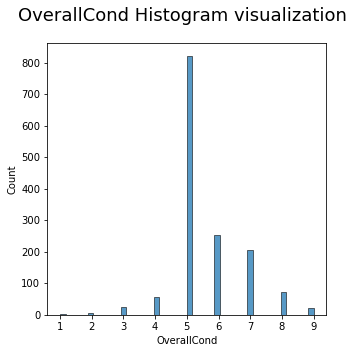

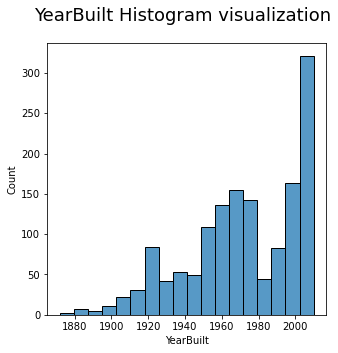

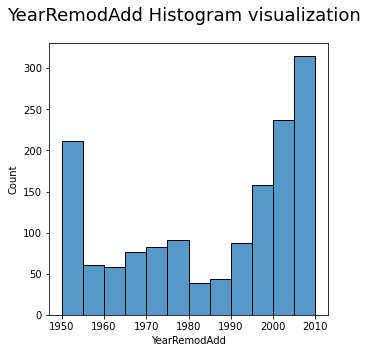

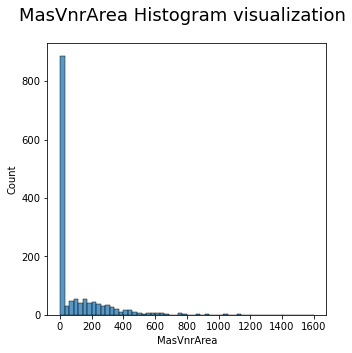

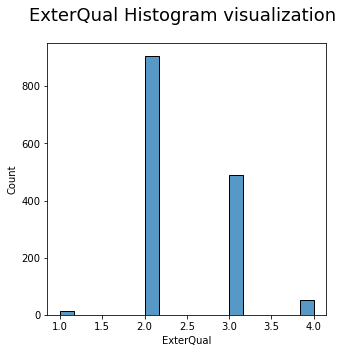

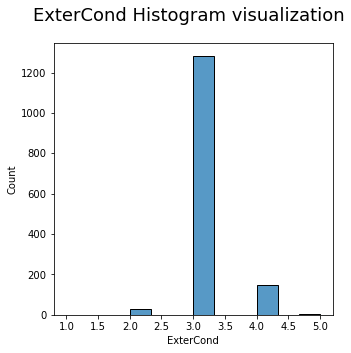

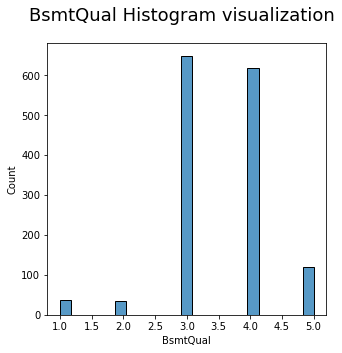

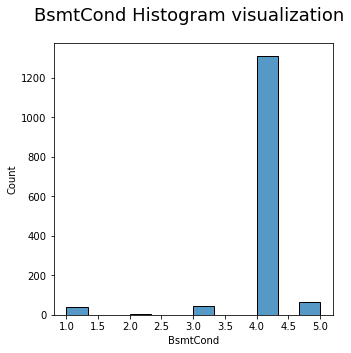

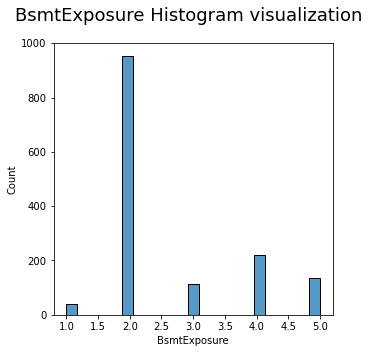

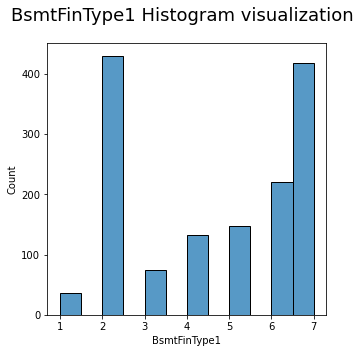

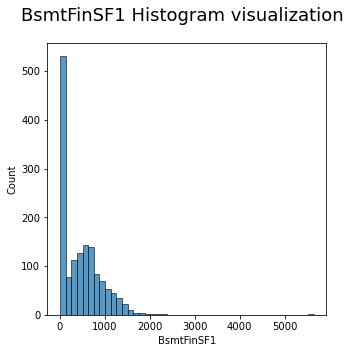

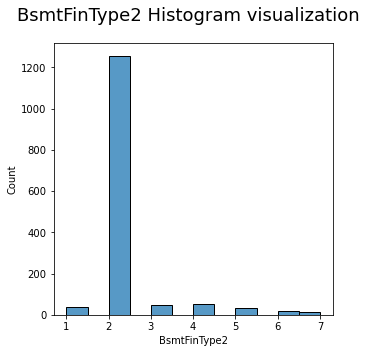

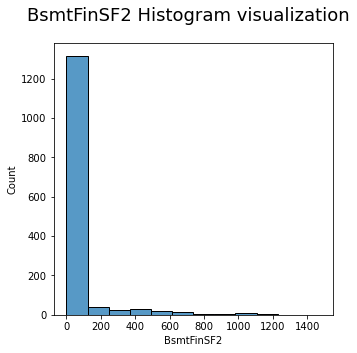

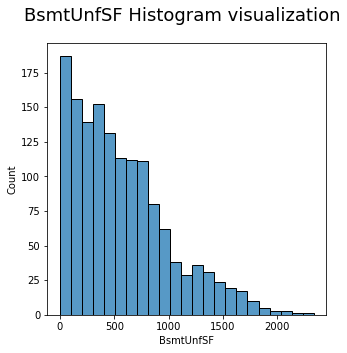

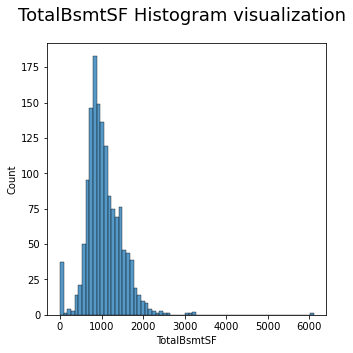

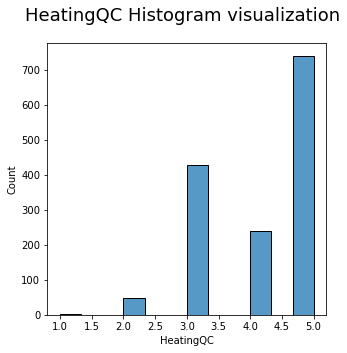

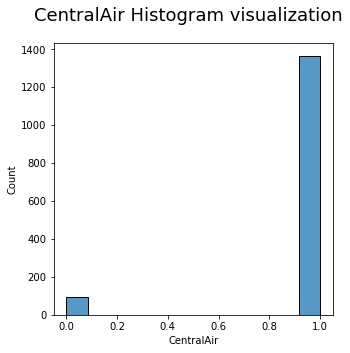

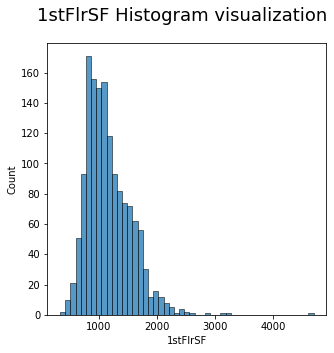

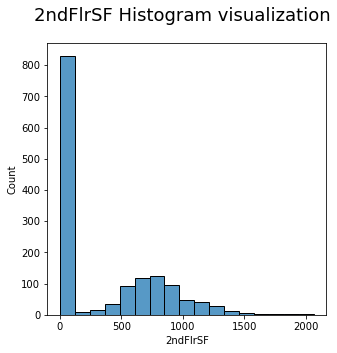

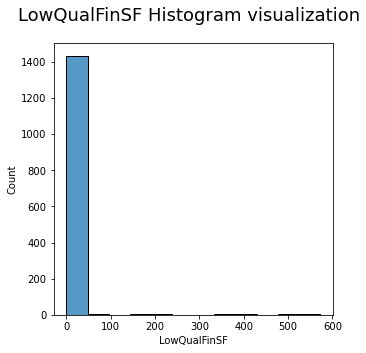

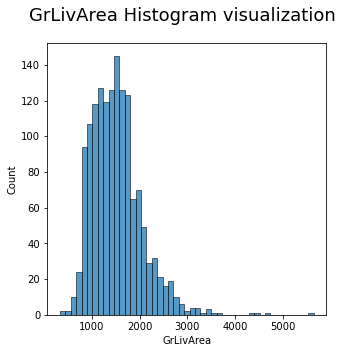

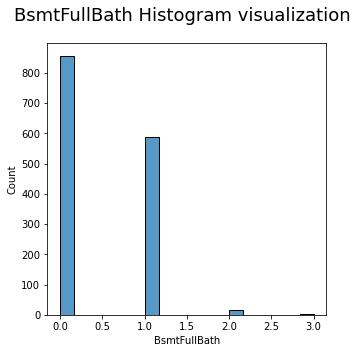

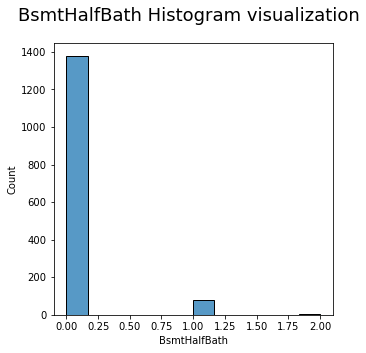

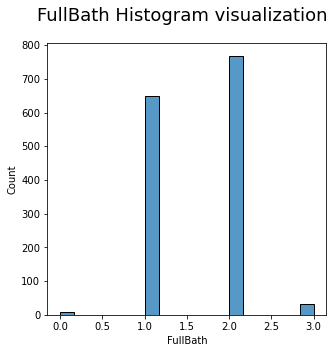

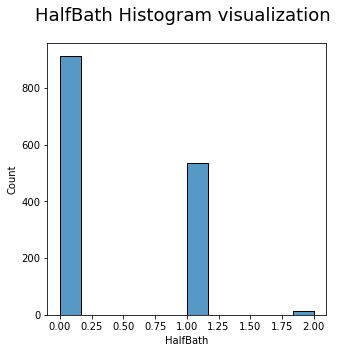

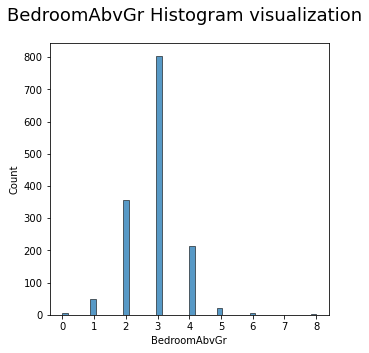

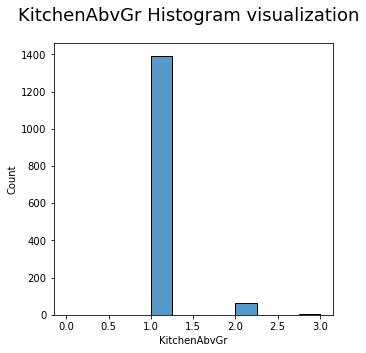

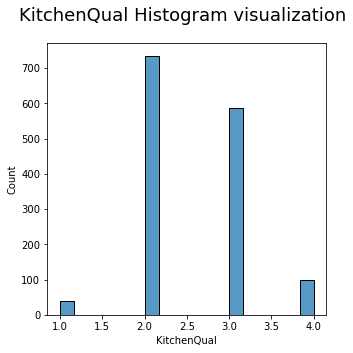

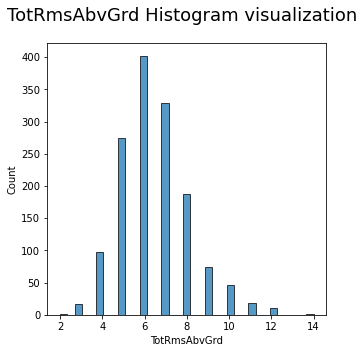

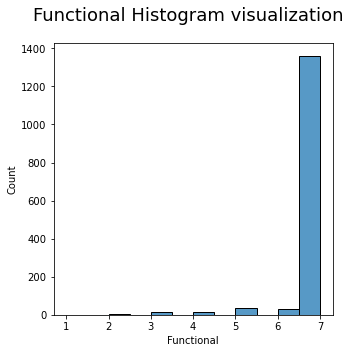

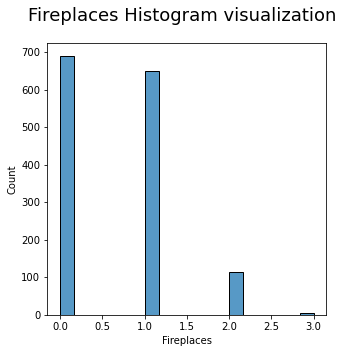

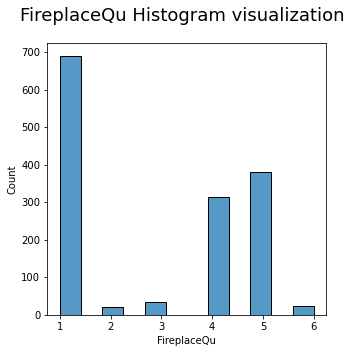

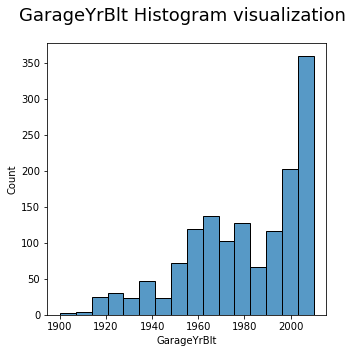

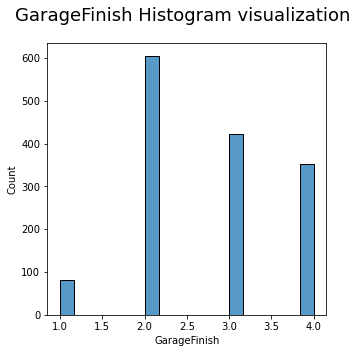

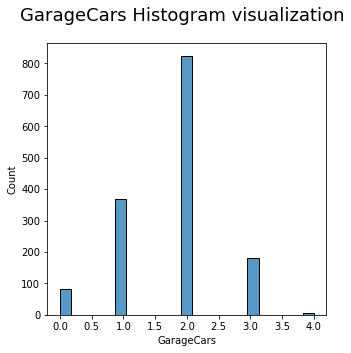

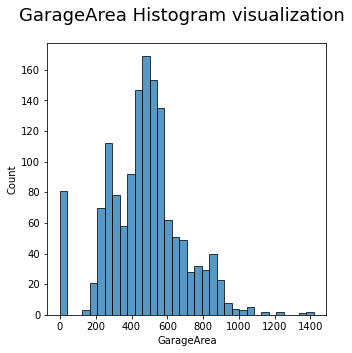

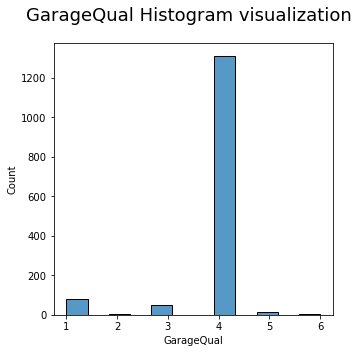

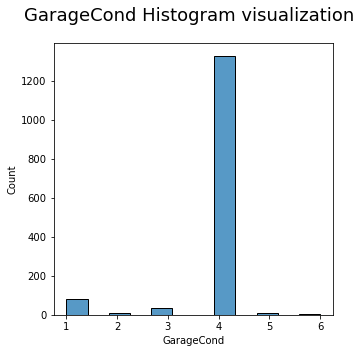

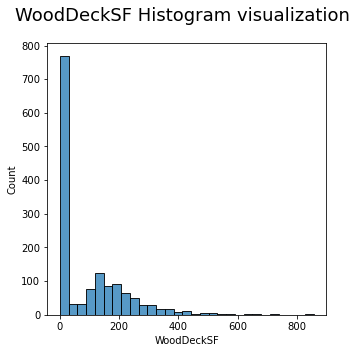

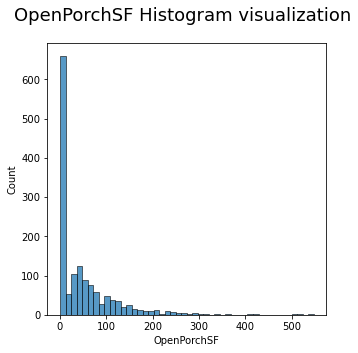

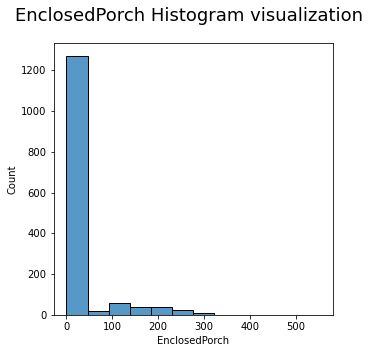

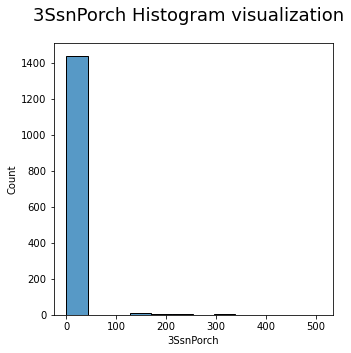

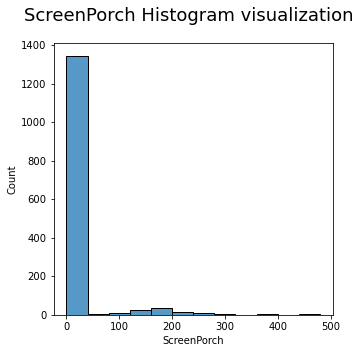

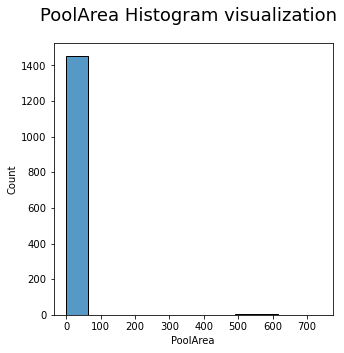

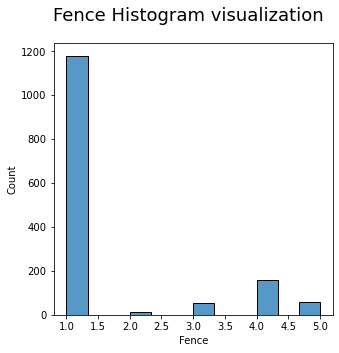

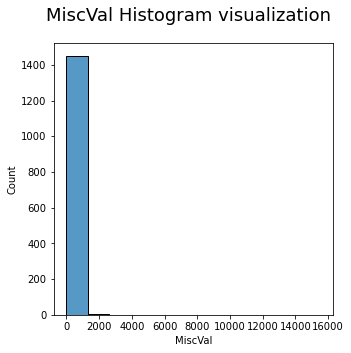

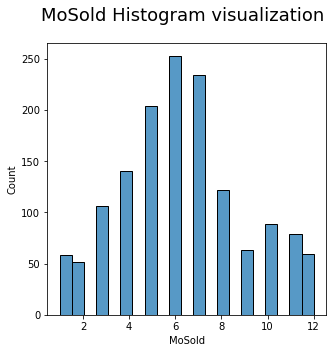

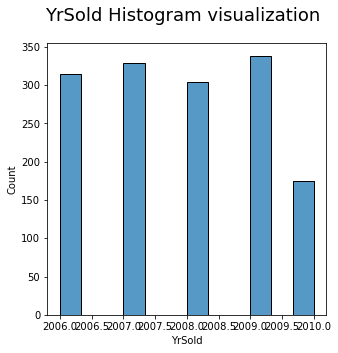

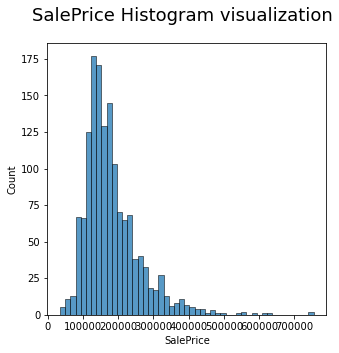

In [35]:
# Studying the data distributions in order to select which Continous attributes to engineer

# A function that creates histogram plot for every numerical feature
def histo_plots(data, category): 
        fig, ax = plt.subplots(1, figsize=(5,5), sharey=True)
        fig.suptitle(category + " Histogram visualization", fontsize=18)
        sns.histplot(data[category], ax=ax)

# Selecting the numerical datatypes in order to be inserted in the plotting function
for i in featdf:
    if(featdf[i].dtype == np.float64 or featdf[i].dtype == np.int64):
        category = histo_plots(featdf, i)

### Standarizing data

In [36]:
# Standarizing the dataframe
standarized_df = (featdf-featdf.mean())/featdf.std()

In [37]:
# Inserting the standarized columns into the original dataframe
for i in standarized_df:
    df[i] = standarized_df[i]

## Continuous attributes

#### Selected Continous attributes:

* LotFrontage: Street linear feet connected to property
* LotArea: Lot size in squared feet
* BsmtUnfSF: Basement unfinished squared feet
* TotalBsmtSF: Total basement squared feet area
* 1stFlrSF: First floor squared feet

In [38]:
# The selected dataframe continuous attributes
ConDF = df[['LotFrontage', 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF']]

# Using log transformation for the data in order to give it a normal-distribution looking distribution
for i in ConDF:
    ConDF[i] = np.log1p(ConDF[i])

C:\Users\Alienware\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
(ConDF.isna().sum() /ConDF.shape[0]).round(2).sort_values()

LotArea        0.00
LotFrontage    0.09
TotalBsmtSF    0.09
1stFlrSF       0.12
BsmtUnfSF      0.16
dtype: float64

In [40]:
ConDF = ConDF.interpolate()

In [41]:
import scipy.stats as spstats

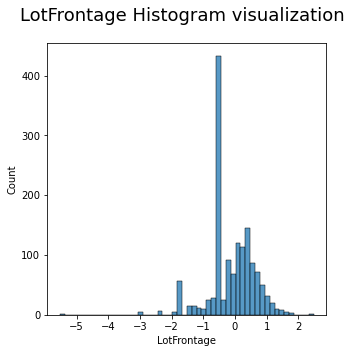

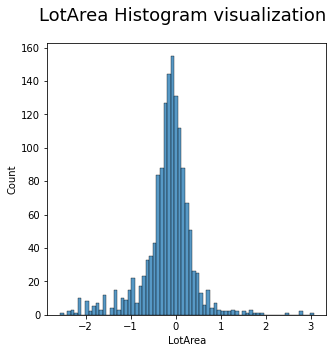

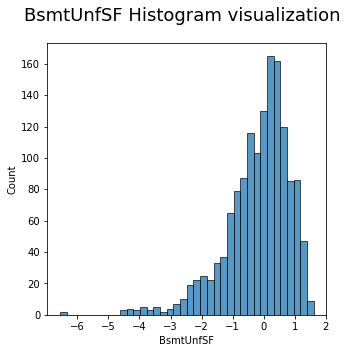

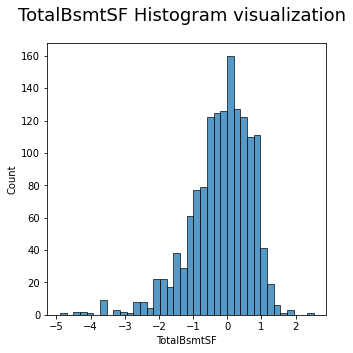

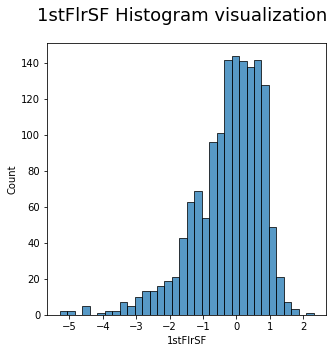

In [42]:
# Distributing the data after the log transformation
for i in ConDF:
    if(ConDF[i].dtype == np.float64 or ConDF[i].dtype == np.int64):
        category = histo_plots(ConDF, i)

In [43]:
ConDF

,LotFrontage,LotArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF
0,-0.157986,-0.232021,-2.887184,-0.614604,-1.575820
1,0.421871,-0.096351,-1.024456,0.382746,0.228770
2,-0.012020,0.070882,-0.358877,-0.375802,-0.987816
3,-0.461700,-0.101882,-0.063631,-1.161835,-0.737214
4,0.532821,0.318468,-0.192135,0.181998,-0.046668
...,...,...,...,...,...
1455,-0.328960,-0.301742,0.627553,-0.271861,-0.781429
1456,0.558736,0.236112,0.048071,0.744100,1.210420
1457,-0.106927,-0.159887,0.531231,0.195211,0.063570
1458,-0.012020,-0.083526,-1.598212,0.045823,-0.247061


In [44]:
for i in ConDF:
    df[i] = ConDF[i]

In [45]:
df

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType5,SaleType6,SaleType7,SaleType8,SaleCondition0,SaleCondition1,SaleCondition2,SaleCondition3,SaleCondition4,SaleCondition5
0,-1.730272,-0.157986,-0.232021,0.701051,0.225639,0.651256,-0.517023,1.050634,0.878367,0.513928,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.727900,0.421871,-0.096351,0.701051,0.225639,-0.071812,2.178881,0.156680,-0.429430,-0.570555,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.725528,-0.012020,0.070882,-1.016288,0.225639,0.651256,-0.517023,0.984415,0.829930,0.325803,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.723156,-0.461700,-0.101882,-1.016288,0.225639,0.651256,-0.517023,-1.862993,-0.720051,-0.570555,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.720785,0.532821,0.318468,-1.016288,0.225639,1.374324,-0.517023,0.951306,0.733056,1.366021,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.720785,-0.328960,-0.301742,0.701051,0.225639,-0.071812,-0.517023,0.918196,0.733056,-0.570555,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,1.723156,0.558736,0.236112,0.701051,0.225639,-0.071812,0.381612,0.222899,0.151813,0.087881,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,1.725528,-0.106927,-0.159887,0.701051,0.225639,0.651256,3.077516,-1.002149,1.023678,-0.570555,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,1.727900,-0.012020,-0.083526,0.701051,0.225639,-0.794879,0.381612,-0.704164,0.539309,-0.570555,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Double BAM! EDA and Feature Engineering are done!

<br>

## Features Selecton

### Plotting the data in order to visualize the data and select features

In [46]:
import seaborn as sns

<AxesSubplot:>

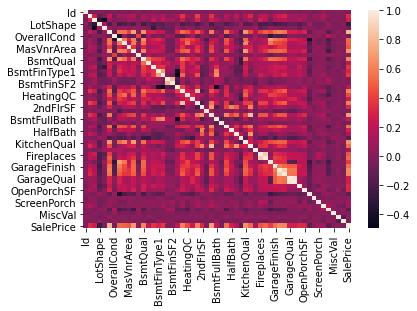

In [47]:
# Features correlation heatmap to represent the correlation status between each 2 features
correlations = featdf.corr()
sns.heatmap(correlations)

In [48]:
# Deleting any feature with over than 90% correlation percentage due to the high similarity
columns = np.full((correlations.shape[0],), True, dtype=bool)
for i in range(correlations.shape[0]):
    for j in range(i+1, correlations.shape[0]):
        if correlations.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = correlations.columns[columns]
dropped = featdf.drop(selected_columns, axis = 1)
featdf = featdf[selected_columns]

In [49]:
# Checking whether the dropped columns were actually correlated logically
dropped.columns

Index(['GarageCond'], dtype='object')

### Dropped columns:

* GarageCond, reason: high correlation with GarageQual (approx 96%)
* Id column, reason: there's no use for it to be there during the model selection phase

In [50]:
# Deleting the column from the original dataframe
df.drop(['GarageCond', 'Id'], axis = 1)

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType5,SaleType6,SaleType7,SaleType8,SaleCondition0,SaleCondition1,SaleCondition2,SaleCondition3,SaleCondition4,SaleCondition5
0,-0.157986,-0.232021,0.701051,0.225639,0.651256,-0.517023,1.050634,0.878367,0.513928,1.051942,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.421871,-0.096351,0.701051,0.225639,-0.071812,2.178881,0.156680,-0.429430,-0.570555,-0.689368,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.012020,0.070882,-1.016288,0.225639,0.651256,-0.517023,0.984415,0.829930,0.325803,1.051942,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.461700,-0.101882,-1.016288,0.225639,0.651256,-0.517023,-1.862993,-0.720051,-0.570555,-0.689368,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.532821,0.318468,-1.016288,0.225639,1.374324,-0.517023,0.951306,0.733056,1.366021,1.051942,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.328960,-0.301742,0.701051,0.225639,-0.071812,-0.517023,0.918196,0.733056,-0.570555,-0.689368,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.558736,0.236112,0.701051,0.225639,-0.071812,0.381612,0.222899,0.151813,0.087881,-0.689368,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,-0.106927,-0.159887,0.701051,0.225639,0.651256,3.077516,-1.002149,1.023678,-0.570555,2.793251,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,-0.012020,-0.083526,0.701051,0.225639,-0.794879,0.381612,-0.704164,0.539309,-0.570555,-0.689368,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
(df.isna().sum() /df.shape[0]).round(2).sort_values()

Id                0.0
RoofMatl3         0.0
RoofMatl4         0.0
RoofMatl5         0.0
RoofMatl6         0.0
                 ... 
LotConfig0        0.0
LotConfig1        0.0
LotConfig2        0.0
LotConfig4        0.0
SaleCondition5    0.0
Length: 244, dtype: float64

#### Dropping all replicated dataframes for memory efficiency

In [52]:
fill_df.drop(fill_df.index, inplace=True)
fill_num.drop(fill_num.index, inplace=True)
ord_features.drop(ord_features.index, inplace=True)
ConDF.drop(ConDF.index, inplace=True)
featdf.drop(featdf.index, inplace=True)
nom_features.drop(nom_features.index, inplace=True)
standarized_df.drop(standarized_df.index, inplace=True)
correlations.drop(correlations.index, inplace=True)

<br>

<br>

## Algorithms application

In [53]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from pprint import pprint

In [54]:
y = df['SalePrice']
X = df.drop(columns = "SalePrice")
accuracies = {}

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=0.25)

<br>

## Polynomial regression

In [56]:
parmeters={"alpha":[0.01,0.1,0.2,0.3]}
degree = PolynomialFeatures(degree=2)
lg = LinearRegression()

X_train_poly = degree.fit_transform(X_train)
lg.fit(X_train_poly,y_train)

LassoReg = RandomizedSearchCV(linear_model.Lasso(),parmeters,cv=5, n_iter=10)
LassoReg = LassoReg.fit(X_train, y_train)
Y_LassoReg = LassoReg.predict(X_train)
mean_squared_error(y_train,Y_LassoReg)

y_LassoReg = LassoReg.predict(X_test)
mean_squared_error(y_test,y_LassoReg)

RidgeReg = RandomizedSearchCV(linear_model.Ridge(),parmeters,cv=5, n_iter=10)
RidgeReg = RidgeReg.fit(X_train, y_train)
Y_RidgeReg = RidgeReg.predict(X_train)
mean_squared_error(y_train,Y_RidgeReg)

y_RidgeReg = RidgeReg.predict(X_test)
mean_squared_error(y_test,y_RidgeReg)

C:\Users\Alienware\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Alienware\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.21539579424822458

In [57]:
RidgeBest = RidgeReg.best_score_
LassoBest = LassoReg.best_score_

print("Rudge: ", RidgeBest, "\nLasso: " , LassoBest)

Rudge:  0.7423939667752657 
Lasso:  0.771622575434894


<br>

## K-nn algorithm

In [58]:
knn = KNeighborsRegressor()
knn.get_params()
array=[]
parameters = {"n_neighbors": range(1,21)}

knn_random = RandomizedSearchCV(KNeighborsRegressor(), parameters,cv = 5, n_iter = 20)
knn_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=20,
                   param_distributions={'n_neighbors': range(1, 21)})

In [59]:
best_knn_model = knn_random.best_estimator_
best_knn_model

KNeighborsRegressor(n_neighbors=11)

In [60]:
knn_random.best_score_

0.7738671942790324

In [61]:
best_knn_model.score(X_test, y_test)

0.771389764684453

<br>

## Random forest algorithm

In [62]:
# Checking the Random forest hyperparameters
rf = RandomForestRegressor()
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [63]:
# Setting the hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 74, num = 10)]
max_depth.append(None)

# Minimum impurity level for each node
min_impurity_decrease = [0.01, 0.05, 0.1, 0.15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 7]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 16]

rf_random = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'min_impurity_decrease': min_impurity_decrease}
pprint(rf_random)

{'max_depth': [5, 12, 20, 28, 35, 43, 51, 58, 66, 74, None],
 'min_impurity_decrease': [0.01, 0.05, 0.1, 0.15],
 'min_samples_leaf': [2, 4, 7],
 'min_samples_split': [5, 10, 16],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200]}


In [64]:
rf_random = RandomizedSearchCV(estimator = rf, # the base model
                               param_distributions = rf_random, # grid of hyper parameters
                               n_iter = 10, # number of combinations of random hyper parameters to choose
                               cv = 5,# 3-fold
                               verbose=2,  # print some logs while evaluating the different combinations
                               random_state=42,
                               n_jobs = 1) # use all cores in the machine to train (parallel)

In [65]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 12, 20, 28, 35, 43, 51,
                                                      58, 66, 74, None],
                                        'min_impurity_decrease': [0.01, 0.05,
                                                                  0.1, 0.15],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [5, 10, 16],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [66]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.15, max_depth=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.15, max_depth=12, total=   3.0s
[CV] n_estimators=900, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.15, max_depth=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.15, max_depth=12, total=   2.9s
[CV] n_estimators=900, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.15, max_depth=12 
[CV]  n_estimators=900, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.15, max_depth=12, total=   3.4s
[CV] n_estimators=900, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.15, max_depth=12 
[CV]  n_estimators=900, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.15, max_depth=12, total=   2.9s
[CV] n_estimators=900, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.15, max_depth=12 
[CV]  n_estimators=900, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.15, max_depth=12, total=   2.8s
[CV] n_estimators=500, min_samples_split=16, min_samples_leaf=7, min_impurity_decrease=0.1, max_depth=66 
[CV]  n_estimators=500, min_samples_split=16, min_samples_leaf=7, min_impurity_decrea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 12, 20, 28, 35, 43, 51,
                                                      58, 66, 74, None],
                                        'min_impurity_decrease': [0.01, 0.05,
                                                                  0.1, 0.15],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [5, 10, 16],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [67]:
best_rf_model = rf_random.best_estimator_
best_rf_model

RandomForestRegressor(min_impurity_decrease=0.01, min_samples_leaf=7,
                      min_samples_split=16, n_estimators=1100)

In [68]:
rf_random.best_score_

0.7896202330056814

In [69]:
best_rf_model.score(X_test, y_test)

0.7611129297043764

<br>

## Gradient boosting algorithm

In [70]:
# Checking the Gradient boositng hyperparameters
gbt = GradientBoostingRegressor()
pprint(gbt.get_params())

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [71]:
# Setting the hyperparameters
# Number of trees in gradient boosting
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 74, num = 10)]
max_depth.append(None)

# Minimum impurity level for each node
min_impurity_decrease = [0.01, 0.05, 0.1, 0.15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 7]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 16]

# Method of selecting samples for training each tree
learning_rate = [0.01, 0.05, 0.1, 0.5]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate,
               'min_impurity_decrease': min_impurity_decrease}
pprint(random_grid)

{'learning_rate': [0.01, 0.05, 0.1, 0.5],
 'max_depth': [5, 12, 20, 28, 35, 43, 51, 58, 66, 74, None],
 'min_impurity_decrease': [0.01, 0.05, 0.1, 0.15],
 'min_samples_leaf': [2, 4, 7],
 'min_samples_split': [5, 10, 16],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200]}


In [72]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
gbt_random = RandomizedSearchCV(estimator = gbt, # the base model
                               param_distributions = random_grid, # grid of hyper parameters
                               n_iter = 10, # number of combinations of random hyper parameters to choose
                               cv = 5,# 3-fold
                               verbose=2,  # print some logs while evaluating the different combinations
                               random_state=42,
                               n_jobs = 1) # use all cores in the machine to train (parallel)

In [73]:
gbt_random

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [5, 12, 20, 28, 35, 43, 51,
                                                      58, 66, 74, None],
                                        'min_impurity_decrease': [0.01, 0.05,
                                                                  0.1, 0.15],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [5, 10, 16],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [74]:
gbt_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=16, min_samples_leaf=2, min_impurity_decrease=0.1, max_depth=28, learning_rate=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=16, min_samples_leaf=2, min_impurity_decrease=0.1, max_depth=28, learning_rate=0.5, total=   1.0s
[CV] n_estimators=400, min_samples_split=16, min_samples_leaf=2, min_impurity_decrease=0.1, max_depth=28, learning_rate=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=16, min_samples_leaf=2, min_impurity_decrease=0.1, max_depth=28, learning_rate=0.5, total=   1.0s
[CV] n_estimators=400, min_samples_split=16, min_samples_leaf=2, min_impurity_decrease=0.1, max_depth=28, learning_rate=0.5 
[CV]  n_estimators=400, min_samples_split=16, min_samples_leaf=2, min_impurity_decrease=0.1, max_depth=28, learning_rate=0.5, total=   0.8s
[CV] n_estimators=400, min_samples_split=16, min_samples_leaf=2, min_impurity_decrease=0.1, max_depth=28, learning_rate=0.5 
[CV]  n_estimators=400, min_samples_split=16, min_samples_leaf=2, min_impurity_decrease=0.1, max_depth=28, learning_rate=0.5, total=   0.8s
[CV] n_estimators=400, min_samples_split=16, min_samples_leaf=2, min_impurity_decrease=0.1, max_depth=28, learning_rate=0.5 
[CV]  n_estimators=400, min_samples_split=16, min_samples_leaf=2, min_impurity_decrease=0.1, max_depth=28, learning_rate=0.5, total=   0.8s
[CV] n_estimators=900, min_samples_split=16, min_samples_leaf=7, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [5, 12, 20, 28, 35, 43, 51,
                                                      58, 66, 74, None],
                                        'min_impurity_decrease': [0.01, 0.05,
                                                                  0.1, 0.15],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [5, 10, 16],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [75]:
best_gbt_model = gbt_random.best_estimator_
best_gbt_model

GradientBoostingRegressor(learning_rate=0.01, max_depth=12,
                          min_impurity_decrease=0.15, min_samples_leaf=7,
                          min_samples_split=16, n_estimators=900)

In [76]:
gbt_random.best_score_

0.8310088055205742

In [77]:
best_gbt_model.score(X_test, y_test)

0.8372229673387214

<br>

## Pickling the model

In [78]:
import pickle

In [83]:
pickle.dump(best_gbt_model, open('bestmodel.sav', 'wb'))
loaded_model = pickle.load(open('bestmodel.sav', 'rb'))

loaded_model

GradientBoostingRegressor(learning_rate=0.01, max_depth=12,
                          min_impurity_decrease=0.15, min_samples_leaf=7,
                          min_samples_split=16, n_estimators=900)